<a href="https://colab.research.google.com/github/DNAsantanu/Deep-Learning-Assignments/blob/main/Stock_price_prediction_Using_RBFN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Collection and preparation:

In [1]:
import yfinance as yf
import pandas as pd

# Define stock indices and date range
indices = {
    "SENSEX": "^BSESN",
    "S&P 500": "^GSPC"
}

start_date = "2019-03-01"
end_date = "2024-03-01"

# Download data
data = {}
for name, ticker in indices.items():
    data[name] = yf.download(ticker, start=start_date, end=end_date)

# Save to CSV files
for name, df in data.items():
    df.to_csv(f"{name}_5yr_data.csv")

print("Downloaded and saved data successfully!")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded and saved data successfully!


In [ ]:
S

dict_items([('SENSEX', Price              Close          High           Low          Open Volume
Ticker            ^BSESN        ^BSESN        ^BSESN        ^BSESN ^BSESN
Date                                                                     
2019-03-01  36063.808594  36140.671875  35952.410156  36018.488281  16700
2019-03-05  36442.539062  36457.441406  35926.941406  36141.070312  21200
2019-03-06  36636.101562  36666.468750  36456.820312  36544.859375  15900
2019-03-07  36725.421875  36830.250000  36590.878906  36744.019531  16800
2019-03-08  36671.429688  36753.589844  36592.929688  36753.589844  14600
...                  ...           ...           ...           ...    ...
2024-02-23  73142.796875  73413.929688  73022.000000  73394.437500  11900
2024-02-26  72790.132812  73092.257812  72666.820312  73044.812500   7900
2024-02-27  73095.218750  73161.296875  72660.132812  72723.531250   8300
2024-02-28  72304.882812  73223.109375  72222.289062  73162.820312   6200
2024-02-29  725

In [2]:
df=pd.read_csv("SENSEX_5yr_data.csv")
df=df.rename(columns={df.columns[0]: 'Date'})
df = df.drop(index=[0,1,2])
df.to_csv("SENSEX_5yr_data.csv", index=False)

df.head()

,Date,Close,High,Low,Open,Volume
3,2019-03-05,36442.5390625,36457.44140625,35926.94140625,36141.0703125,21200
4,2019-03-06,36636.1015625,36666.46875,36456.8203125,36544.859375,15900
5,2019-03-07,36725.421875,36830.25,36590.87890625,36744.01953125,16800
6,2019-03-08,36671.4296875,36753.58984375,36592.9296875,36753.58984375,14600
7,2019-03-11,37054.1015625,37106.19140625,36726.390625,36741.5703125,14400


In [3]:
df=pd.read_csv("S&P 500_5yr_data.csv")
df=df.rename(columns={df.columns[0]: 'Date'})
df = df.drop(index=[0,1,2])
df.to_csv("S&P_5yr_data.csv", index=False)

df.head()

,Date,Close,High,Low,Open,Volume
3,2019-03-04,2792.81005859375,2816.8798828125,2767.659912109375,2814.3701171875,3949730000
4,2019-03-05,2789.64990234375,2796.43994140625,2782.969970703125,2794.409912109375,3631380000
5,2019-03-06,2771.449951171875,2790.27001953125,2768.68994140625,2790.27001953125,3800180000
6,2019-03-07,2748.929931640625,2767.25,2739.090087890625,2766.530029296875,3932150000
7,2019-03-08,2743.070068359375,2744.1298828125,2722.27001953125,2730.7900390625,3424300000


In [4]:
df.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [5]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,1258,1258,1258,1258,1258,1258
unique,1258,1256,1252,1254,1253,1253
top,2019-03-04,2926.4599609375,4429.97021484375,4103.97998046875,4367.43017578125,3887250000
freq,1,2,2,2,2,2


In [6]:
cols = ["Open", "High", "Low", "Close", "Volume"]
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")


In [7]:
df.dtypes

,0
Date,object
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64


In [8]:
import pandas as pd

# Function to count increases and decreases
def count_increases_decreases(file_path):
    df = pd.read_csv(file_path)
    df=df.rename(columns={df.columns[0]: 'Date'})
    df = df.drop(index=[0,1,2])
    cols = ["Open", "High", "Low", "Close", "Volume"]
    df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")


    # Ensure data is sorted by Date
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date")

    # Calculate daily change
    df["Change"] = df["Close"].diff()

    # Count cases
    increase_count = (df["Change"] > 0).sum()
    decrease_count = (df["Change"] < 0).sum()

    return increase_count, decrease_count

# Analyze both indices
indices = ["SENSEX_5yr_data.csv", "S&P 500_5yr_data.csv"]
for file in indices:
    increases, decreases = count_increases_decreases(file)
    print(f"For {file}: Increases = {increases}, Decreases = {decreases}")


For SENSEX_5yr_data.csv: Increases = 671, Decreases = 554
For S&P 500_5yr_data.csv: Increases = 679, Decreases = 578


In [9]:
import pandas as pd

# Function to compute technical indicators
def compute_technical_indicators(df, ma_period=14, macd_short=12, macd_long=26, macd_signal=9, stochastic_period=14, rsi_period=14):

    # Ensure Date is in correct format
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date")

    # 1️⃣ Simple Moving Average (SMA)
    df["SMA"] = df["Close"].rolling(window=ma_period).mean()

    # 2️⃣ Moving Average Convergence Divergence (MACD)
    short_ema = df["Close"].ewm(span=macd_short, adjust=False).mean()
    long_ema = df["Close"].ewm(span=macd_long, adjust=False).mean()
    df["MACD"] = short_ema - long_ema
    df["MACD_Signal"] = df["MACD"].ewm(span=macd_signal, adjust=False).mean()

    # 3️⃣ Stochastic KD (Stochastic Oscillator)
    df["Lowest_Low"] = df["Low"].rolling(window=stochastic_period).min()
    df["Highest_High"] = df["High"].rolling(window=stochastic_period).max()
    df["%K"] = 100 * ((df["Close"] - df["Lowest_Low"]) / (df["Highest_High"] - df["Lowest_Low"]))
    df["%D"] = df["%K"].rolling(window=3).mean()  # 3-day moving average of %K

    # 4️⃣ Relative Strength Index (RSI)
    delta = df["Close"].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=rsi_period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=rsi_period).mean()
    rs = gain / loss
    df["RSI"] = 100 - (100 / (1 + rs))

    # 5️⃣ Larry Williams’ %R
    df["Williams %R"] = -100 * ((df["Highest_High"] - df["Close"]) / (df["Highest_High"] - df["Lowest_Low"]))

    # Drop intermediate columns
    df.drop(columns=["Lowest_Low", "Highest_High"], inplace=True)

    return df

# Example usage
df = pd.read_csv("SENSEX_5yr_data.csv")  # Replace with actual file
df = compute_technical_indicators(df)

# Save the updated dataset with indicators
df.to_csv("SENSEX_technical_indicators.csv", index=False)

print("Technical indicators computed and saved successfully!")


Technical indicators computed and saved successfully!


### After Creating the Technical indicators there are lot of NaN values, you need to remove this.

In [11]:
df.head()

,Date,Close,High,Low,Open,Volume,SMA,MACD,MACD_Signal,%K,%D,RSI,Williams %R
0,2019-03-05,36442.539062,36457.441406,35926.941406,36141.070312,21200,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
1,2019-03-06,36636.101562,36666.468750,36456.820312,36544.859375,15900,NaN,15.440883,3.088177,NaN,NaN,NaN,NaN
2,2019-03-07,36725.421875,36830.250000,36590.878906,36744.019531,16800,NaN,34.487744,9.368090,NaN,NaN,NaN,NaN
3,2019-03-08,36671.429688,36753.589844,36592.929688,36753.589844,14600,NaN,44.710406,16.436553,NaN,NaN,NaN,NaN
4,2019-03-11,37054.101562,37106.191406,36726.390625,36741.570312,14400,NaN,82.736626,29.696568,NaN,NaN,NaN,NaN


In [12]:
df.describe()

,Date,Close,High,Low,Open,Volume,SMA,MACD,MACD_Signal,%K,%D,RSI,Williams %R
count,1229,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1216.000000,1229.000000,1229.000000,1216.000000,1214.000000,1216.000000,1216.000000
mean,2021-09-03 23:34:13.376729088,51550.479676,51846.002915,51242.556504,51589.274175,14968.592352,51514.297951,201.974608,200.746820,60.878501,60.865061,56.081408,-39.121499
min,2019-03-05 00:00:00,25981.240234,27462.869141,25638.900391,26499.810547,0.000000,28696.667969,-3404.598817,-2843.417402,0.771972,3.033367,6.186387,-99.228028
25%,2020-06-12 00:00:00,39872.308594,40122.339844,39667.468750,39947.800781,7600.000000,39810.483259,-164.068935,-147.656468,36.064696,36.033427,43.335235,-63.935304
50%,2021-09-06 00:00:00,53424.089844,53819.308594,53120.789062,53501.210938,11900.000000,53841.133092,271.385840,266.211630,66.255081,66.889448,55.756775,-33.744919
75%,2022-12-01 00:00:00,60284.308594,60586.769531,59949.218750,60303.789062,18200.000000,60248.636998,614.386109,583.004181,89.913902,87.119342,69.176293,-10.086098
max,2024-02-29 00:00:00,73327.937500,73427.593750,73022.000000,73394.437500,188300.000000,72450.553571,1445.034085,1321.157602,99.287490,98.764423,98.306224,-0.712510
std,NaN,11331.524729,11317.959557,11329.366468,11313.781174,12405.386152,11205.656074,634.310683,598.235621,30.517555,28.469003,17.362466,30.517555


In [13]:
df.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,13
MACD,0
MACD_Signal,0
%K,13


In [14]:
df.dropna(inplace=True)
df.to_csv("SENSEX_cleaned.csv", index=False)
print("Missing values removed and data saved successfully!")


Missing values removed and data saved successfully!


In [15]:
df=pd.read_csv("SENSEX_cleaned.csv")
# df.head()
df.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
MACD,0
MACD_Signal,0
%K,0


In [16]:
import pandas as pd

# Load Data
df = pd.read_csv("SENSEX_technical_indicators.csv")  # Replace with actual file

# Compute Direction (1 = Up, 0 = Down)
df["Direction"] = (df["Close"].diff() > 0).astype(int)

# Remove the first row since it has NaN in Direction
df = df.dropna().reset_index(drop=True)

# Save updated data
df.to_csv("SENSEX_with_direction.csv", index=False)

print("Direction column added successfully!")


Direction column added successfully!


In [17]:
df.head()

,Date,Close,High,Low,Open,Volume,SMA,MACD,MACD_Signal,%K,%D,RSI,Williams %R,Direction
0,2019-03-27,38132.878906,38475.929688,38001.339844,38372.031250,18800,37764.506696,450.066059,390.712564,78.122149,77.917317,75.270562,-21.877851,0
1,2019-03-28,38545.718750,38593.648438,38148.441406,38208.300781,16000,37894.527902,471.892741,406.948600,97.604377,86.669785,77.705995,-2.395623,1
2,2019-04-01,38871.871094,39115.570312,38808.738281,38858.878906,19800,38051.702288,509.633573,427.485594,89.799879,88.508802,80.929545,-10.200121,1
3,2019-04-02,39056.648438,39121.691406,38846.960938,38988.570312,19700,38194.741350,548.134883,451.615452,96.560102,94.654786,79.806111,-3.439898,1
4,2019-04-03,38877.121094,39270.140625,38826.558594,39167.050781,17000,38290.559989,557.731907,472.838743,78.059163,88.139714,71.938957,-21.940837,0


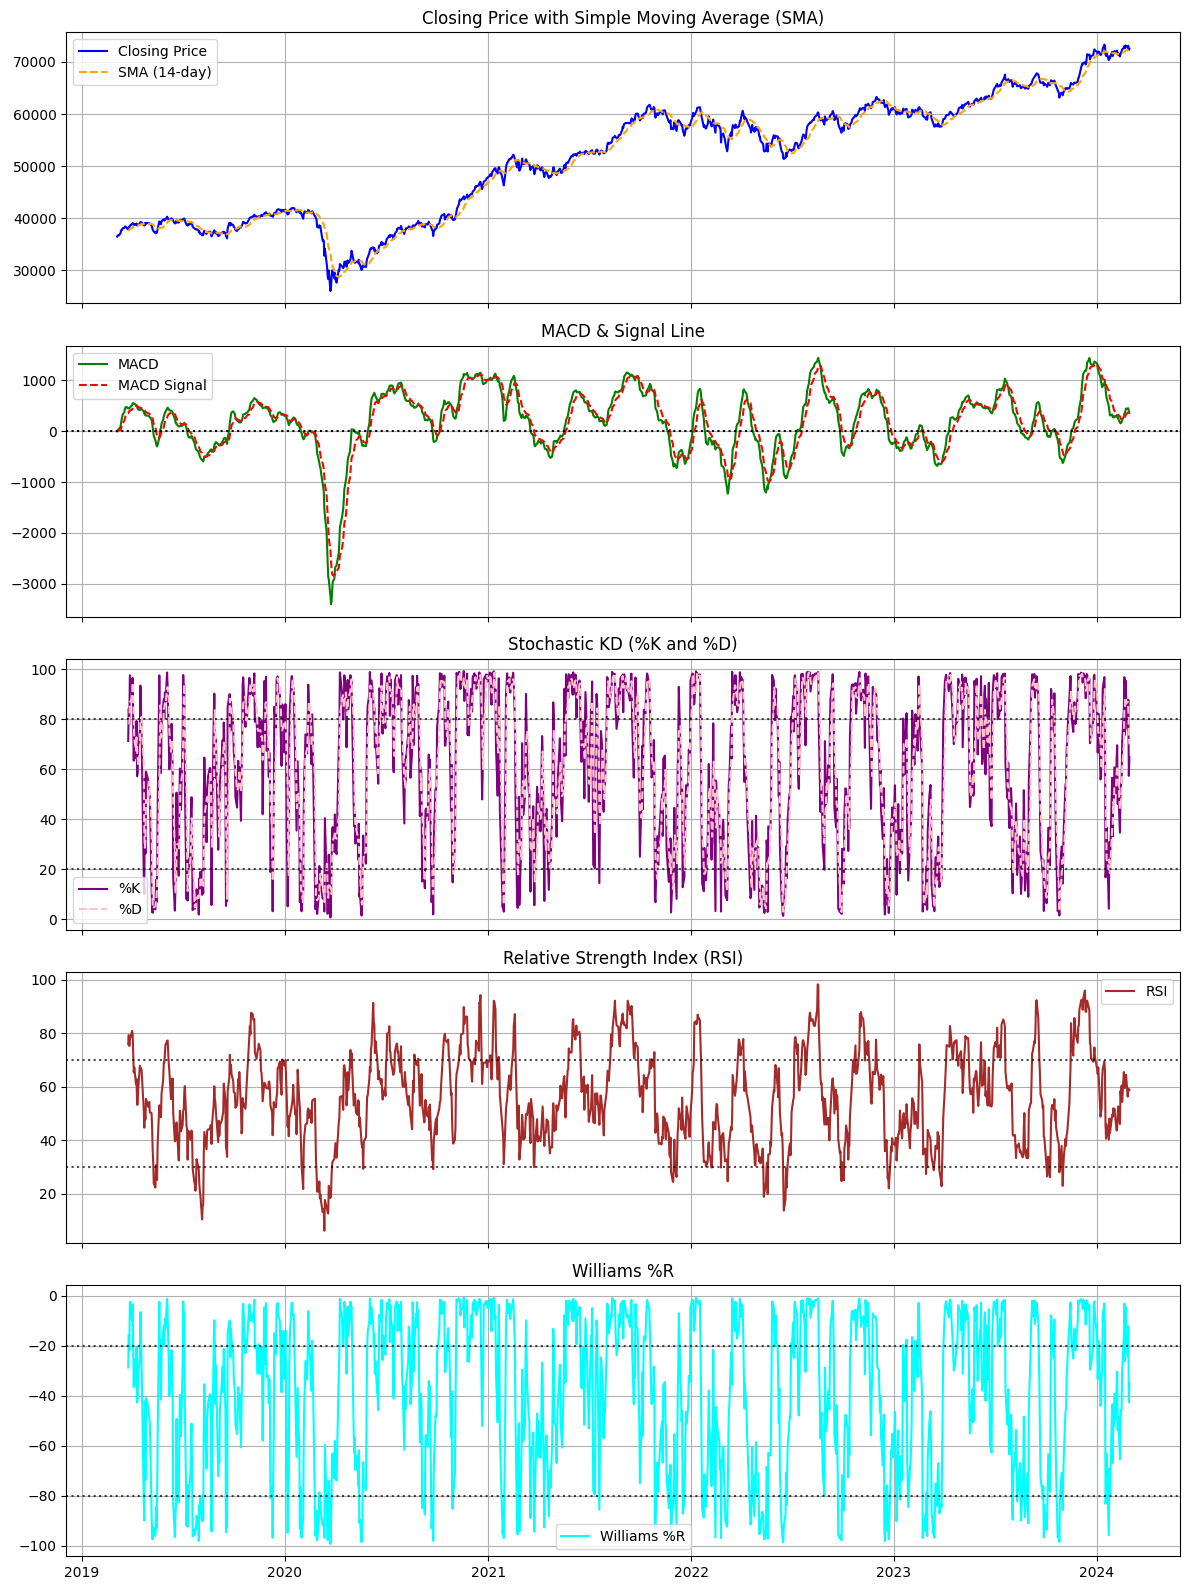

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data with computed indicators
df = pd.read_csv("SENSEX_technical_indicators.csv")  # Replace with actual file

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)  # Set Date as index for plotting

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(12, 16), sharex=True)

# 1️⃣ Closing Price with SMA
axs[0].plot(df.index, df["Close"], label="Closing Price", color="blue")
axs[0].plot(df.index, df["SMA"], label="SMA (14-day)", color="orange", linestyle="dashed")
axs[0].set_title("Closing Price with Simple Moving Average (SMA)")
axs[0].legend()
axs[0].grid()

# 2️⃣ MACD & Signal Line
axs[1].plot(df.index, df["MACD"], label="MACD", color="green")
axs[1].plot(df.index, df["MACD_Signal"], label="MACD Signal", color="red", linestyle="dashed")
axs[1].axhline(0, color="black", linestyle="dotted")
axs[1].set_title("MACD & Signal Line")
axs[1].legend()
axs[1].grid()

# 3️⃣ Stochastic KD (%K and %D)
axs[2].plot(df.index, df["%K"], label="%K", color="purple")
axs[2].plot(df.index, df["%D"], label="%D", color="pink", linestyle="dashed")
axs[2].axhline(80, color="black", linestyle="dotted", alpha=0.7)  # Overbought threshold
axs[2].axhline(20, color="black", linestyle="dotted", alpha=0.7)  # Oversold threshold
axs[2].set_title("Stochastic KD (%K and %D)")
axs[2].legend()
axs[2].grid()

# 4️⃣ RSI (Relative Strength Index)
axs[3].plot(df.index, df["RSI"], label="RSI", color="brown")
axs[3].axhline(70, color="black", linestyle="dotted", alpha=0.7)  # Overbought
axs[3].axhline(30, color="black", linestyle="dotted", alpha=0.7)  # Oversold
axs[3].set_title("Relative Strength Index (RSI)")
axs[3].legend()
axs[3].grid()

# 5️⃣ Williams %R
axs[4].plot(df.index, df["Williams %R"], label="Williams %R", color="cyan")
axs[4].axhline(-20, color="black", linestyle="dotted", alpha=0.7)  # Overbought
axs[4].axhline(-80, color="black", linestyle="dotted", alpha=0.7)  # Oversold
axs[4].set_title("Williams %R")
axs[4].legend()
axs[4].grid()

# Adjust layout
plt.tight_layout()
plt.show()


### DATA Normalizaton

In [19]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load Data
df = pd.read_csv("SENSEX_with_direction.csv")  # Replace with your actual file

# Select Technical Indicator Columns
technical_indicators = ["SMA", "MACD", "MACD_Signal", "%K", "%D", "RSI", "Williams %R"]

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling
df[technical_indicators] = scaler.fit_transform(df[technical_indicators])

# Save Normalized Data
df.to_csv("SENSEX_normalized.csv", index=False)

print("Min-Max Scaling applied successfully!")


Min-Max Scaling applied successfully!


In [20]:
df.head()

,Date,Close,High,Low,Open,Volume,SMA,MACD,MACD_Signal,%K,%D,RSI,Williams %R,Direction
0,2019-03-27,38132.878906,38475.929688,38001.339844,38372.031250,18800,0.207246,0.794836,0.776581,0.785157,0.782233,0.749938,0.785157,0
1,2019-03-28,38545.718750,38593.648438,38148.441406,38208.300781,16000,0.210218,0.799337,0.780480,0.982915,0.873660,0.776376,0.982915,1
2,2019-04-01,38871.871094,39115.570312,38808.738281,38858.878906,19800,0.213810,0.807119,0.785411,0.903694,0.892870,0.811369,0.903694,1
3,2019-04-02,39056.648438,39121.691406,38846.960938,38988.570312,19700,0.217080,0.815058,0.791205,0.972315,0.957071,0.799173,0.972315,1
4,2019-04-03,38877.121094,39270.140625,38826.558594,39167.050781,17000,0.219269,0.817037,0.796301,0.784518,0.889015,0.713772,0.784518,0


In [21]:
cols=['SMA', 'MACD', '%K', '%D', 'RSI', 'Williams %R','Direction']
df=df[cols]

### Creating Network Structure:

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score

# Load Normalized Data
df = pd.read_csv("SENSEX_normalized.csv")  # Ensure the dataset is normalized

# Select Features (Technical Indicators)
X = df[["SMA", "MACD", "MACD_Signal", "%K", "%D", "RSI"]].values
y = df["Direction"].values  # Target: 0 (down) or 1 (up)

# Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Hyperparameters
hidden_neurons = 14  # Number of RBF neurons (try different values)
sigma = 0.5  # Spread of RBF neurons

# Step 1: Select Random Centers from Training Data
random_indices = np.random.choice(len(X_train), hidden_neurons, replace=False)
centers = X_train[random_indices]

# Step 2: Compute Radial Basis Function (Gaussian Kernel)
def gaussian_rbf(X, centers, sigma):
    distances = cdist(X, centers, metric="euclidean")  # Compute distance from centers
    return np.exp(-(distances**2) / (2 * sigma**2))  # Apply Gaussian function

# Compute RBF Transform
phi_train = gaussian_rbf(X_train, centers, sigma)
phi_test = gaussian_rbf(X_test, centers, sigma)

# Step 3: Compute Output Weights using Least Squares (Pseudo-Inverse)
W = np.linalg.pinv(phi_train) @ y_train  # Solve for weights

# Step 4: Predict on Test Set
y_pred = phi_test @ W  # Compute output
y_pred = (y_pred >= 0.5).astype(int)  # Convert to binary output (0 or 1)

# Step 5: Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"RBFN Accuracy: {accuracy:.2f}")


RBFN Accuracy: 0.83


In [28]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Define seven basis functions
def gaussian(x, c, s):
    return np.exp(-np.linalg.norm(x - c, axis=1)**2 / (2 * s**2))

def multiquadratic(x, c, s):
    return np.sqrt(np.linalg.norm(x - c, axis=1)**2 + s**2)

def inverse_multiquadratic(x, c, s):
    return 1 / np.sqrt(np.linalg.norm(x - c, axis=1)**2 + s**2)

def thin_plate_spline(x, c, s):
    r = np.linalg.norm(x - c, axis=1)
    return (r**2) * np.log(r + 1e-6)  # Added small constant to avoid log(0)

def logistic(x, c, s):
    return 1 / (1 + np.exp(-np.linalg.norm(x - c, axis=1) / s))

def cubic(x, c, s):
    return np.linalg.norm(x - c, axis=1)**3

def linear(x, c, s):
    return np.linalg.norm(x - c, axis=1)

# RBF Network class
class RBFN:
    def __init__(self, num_neurons=10, basis_function='gaussian', reg_param=0.01):
        self.num_neurons = num_neurons
        self.basis_function = basis_function
        self.reg_param = reg_param
        self.centers = None
        self.sigma = None
        self.weights = None

    def _apply_basis_function(self, x):
        phi_matrix = np.zeros((x.shape[0], self.num_neurons))
        for i, center in enumerate(self.centers):
            if self.basis_function == 'gaussian':
                phi_matrix[:, i] = gaussian(x, center, self.sigma)
            elif self.basis_function == 'multiquadratic':
                phi_matrix[:, i] = multiquadratic(x, center, self.sigma)
            elif self.basis_function == 'inverse_multiquadratic':
                phi_matrix[:, i] = inverse_multiquadratic(x, center, self.sigma)
            elif self.basis_function == 'thin_plate_spline':
                phi_matrix[:, i] = thin_plate_spline(x, center, self.sigma)
            elif self.basis_function == 'logistic':
                phi_matrix[:, i] = logistic(x, center, self.sigma)
            elif self.basis_function == 'cubic':
                phi_matrix[:, i] = cubic(x, center, self.sigma)
            elif self.basis_function == 'linear':
                phi_matrix[:, i] = linear(x, center, self.sigma)
        return phi_matrix

    def fit(self, X, y):
        # Step 1: Compute centers using K-means clustering
        kmeans = KMeans(n_clusters=self.num_neurons, random_state=42)
        kmeans.fit(X)
        self.centers = kmeans.cluster_centers_

        # Step 2: Compute sigma (width of RBFs)
        d_max = np.max([np.linalg.norm(c1 - c2) for c1 in self.centers for c2 in self.centers])
        self.sigma = d_max / np.sqrt(2 * self.num_neurons)

        # Step 3: Compute design matrix
        Phi = self._apply_basis_function(X)

        # Step 4: Compute weights using Ridge Regression
        I = np.identity(self.num_neurons)
        self.weights = np.linalg.inv(Phi.T @ Phi + self.reg_param * I) @ Phi.T @ y

    def predict(self, X):
        Phi = self._apply_basis_function(X)
        y_pred = Phi @ self.weights
        return (y_pred > 0.5).astype(int)  # Convert to binary class (0 or 1)

    def reset(self):
        self.centers = None
        self.sigma = None
        self.weights = None

# Load synthetic dataset (replace this with actual stock data)
np.random.seed(42)
X = np.random.rand(1000, 6)  # Simulating 6 technical indicators as inputs
y = np.random.randint(0, 2, 1000)  # Binary classification for stock trend

# Normalize data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate performance with different basis functions
basis_functions = ['gaussian', 'multiquadratic', 'inverse_multiquadratic',
                   'thin_plate_spline', 'logistic', 'cubic', 'linear']

results = {}
for basis in basis_functions:
    model = RBFN(num_neurons=10, basis_function=basis, reg_param=0.06)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[basis] = {'Accuracy': accuracy, 'F1-Score': f1}

# Print results
for basis, scores in results.items():
    print(f"Basis Function: {basis}")
    print(f"  Accuracy: {scores['Accuracy']:.4f}")
    print(f"  F1-Score: {scores['F1-Score']:.4f}\n")


Basis Function: gaussian
  Accuracy: 0.5300
  F1-Score: 0.2295

Basis Function: multiquadratic
  Accuracy: 0.4950
  F1-Score: 0.5388

Basis Function: inverse_multiquadratic
  Accuracy: 0.5750
  F1-Score: 0.5771

Basis Function: thin_plate_spline
  Accuracy: 0.5300
  F1-Score: 0.4051

Basis Function: logistic
  Accuracy: 0.4850
  F1-Score: 0.5726

Basis Function: cubic
  Accuracy: 0.4650
  F1-Score: 0.4153

Basis Function: linear
  Accuracy: 0.4850
  F1-Score: 0.5253



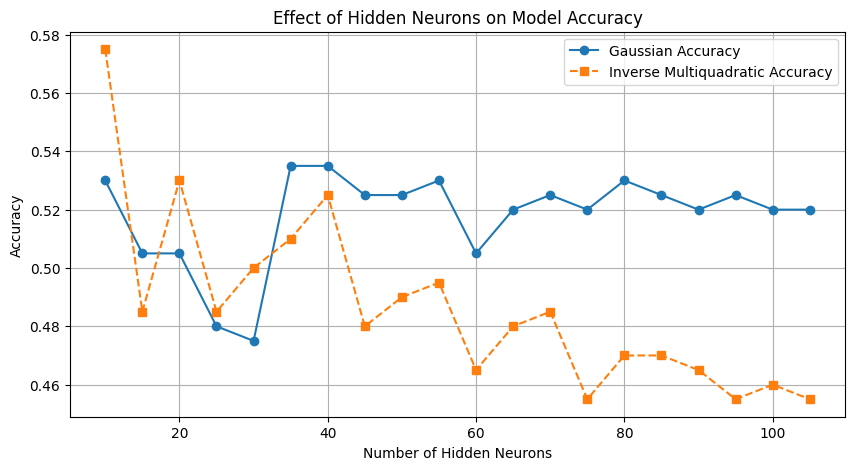

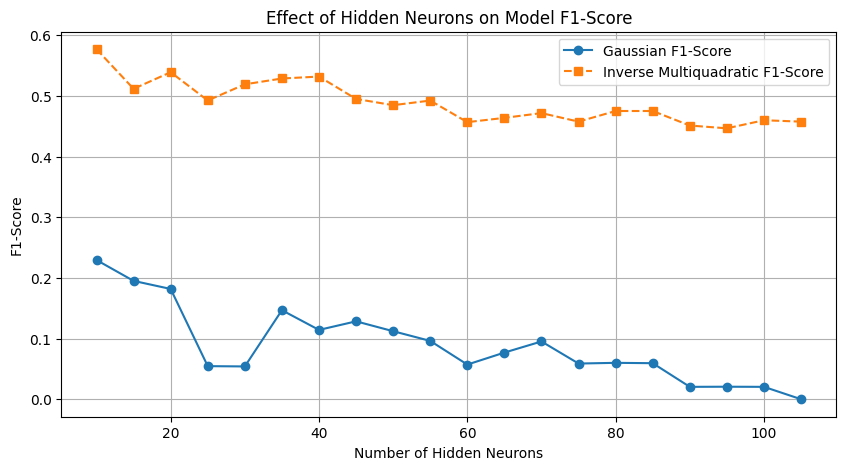

In [30]:
# Test for different hidden layer sizes
hidden_neurons_list = range(10, 110, 5)  # 10 to 100 with step size 10
results = {"gaussian": [], "inverse_multiquadratic": []}

for num_neurons in hidden_neurons_list:
    for basis in ["gaussian", "inverse_multiquadratic"]:
        model = RBFN(num_neurons=num_neurons, basis_function=basis, reg_param=0.06)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results[basis].append((num_neurons, accuracy, f1))

# Convert results to lists for plotting
hidden_sizes = [res[0] for res in results["gaussian"]]
accuracy_gaussian = [res[1] for res in results["gaussian"]]
accuracy_inverse = [res[1] for res in results["inverse_multiquadratic"]]
f1_gaussian = [res[2] for res in results["gaussian"]]
f1_inverse = [res[2] for res in results["inverse_multiquadratic"]]

# Plot Accuracy vs Hidden Neurons
plt.figure(figsize=(10, 5))
plt.plot(hidden_sizes, accuracy_gaussian, marker='o', linestyle='-', label="Gaussian Accuracy")
plt.plot(hidden_sizes, accuracy_inverse, marker='s', linestyle='--', label="Inverse Multiquadratic Accuracy")
plt.xlabel("Number of Hidden Neurons")
plt.ylabel("Accuracy")
plt.title("Effect of Hidden Neurons on Model Accuracy")
plt.legend()
plt.grid()
plt.show()

# Plot F1-score vs Hidden Neurons
plt.figure(figsize=(10, 5))
plt.plot(hidden_sizes, f1_gaussian, marker='o', linestyle='-', label="Gaussian F1-Score")
plt.plot(hidden_sizes, f1_inverse, marker='s', linestyle='--', label="Inverse Multiquadratic F1-Score")
plt.xlabel("Number of Hidden Neurons")
plt.ylabel("F1-Score")
plt.title("Effect of Hidden Neurons on Model F1-Score")
plt.legend()
plt.grid()
plt.show()


In [29]:
model.reset()